In [1563]:
#PYTANIA
#BATH, PROPERTYSQFT CO ZROBIC Z WARTOSCIAMI KTORE WYGLADAJA JAK UZUPELNIENIE PUSTYCH KOMOREK?
#co zostało do wyczyszeczenia: ,'LONG_NAME' ,'FORMATTED_ADDRESS','BROKERTITLE'}

In [1564]:
!pip install folium

In [1565]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium


Celem jest predykcja ceny nieruchomości.

Zbiór danych zawiera 4802 instancje i kolumny określające:

category - BROKERTITLE: Title of the broker
category - TYPE: Type of the house 
number - PRICE: Price of the house, >0
number - BEDS: Number of bedrooms, only whole numbers, >0
number - BATH: Number of bathrooms, only whole numbers, >0
number - PROPERTYSQFT: Square footage of the property, >0
check - ADDRESS: Full address of the house
category - STATE: State of the house
check - MAIN_ADDRESS: Main address information
category - ADMINISTRATIVE_AREA_LEVEL_2: Administrative area level 2 information
category - LOCALITY: Locality information
category - SUBLOCALITY: Sublocality information
category - STREET_NAME: Street name
check - LONG_NAME: Long name
check - FORMATTED_ADDRESS: Formatted address
number - LATITUDE: Latitude coordinate of the house
number - LONGITUDE: Longitude coordinate of the house

In [1566]:
url = 'NY-House-Dataset.csv'
data = pd.read_csv(url, sep= ';')

In [1567]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [1568]:
data['PRICE'] = data['PRICE'].astype(float)

In [1569]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   float64
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [1570]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PRICE,4801.0,2.356940e+06,3.135525e+07,2494.000000,499000.000000,825000.000000,1.495000e+06,2.147484e+09
BEDS,4801.0,3.356801e+00,2.602315e+00,1.000000,2.000000,3.000000,4.000000e+00,5.000000e+01
BATH,4801.0,2.373861e+00,1.946962e+00,0.000000,1.000000,2.000000,3.000000e+00,5.000000e+01
PROPERTYSQFT,4801.0,2.184208e+03,2.377141e+03,230.000000,1200.000000,2184.207862,2.184208e+03,6.553500e+04
LATITUDE,4801.0,4.071423e+01,8.767557e-02,40.499546,40.639375,40.726749,4.077192e+01,4.091273e+01
LONGITUDE,4801.0,-7.394160e+01,1.010825e-01,-74.253033,-73.987143,-73.949189,-7.387064e+01,-7.370245e+01


In [1571]:
data.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000.0,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000.0,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000.0,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000.0,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000.0,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [1572]:
numeric_columns = {'PRICE', 'BEDS','BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE'}
category_columns = {'TYPE', 'BROKERTITLE', 'STATE', 'LONG_NAME', 'LOCALITY', 'ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2', 'SUBLOCALITY', 'MAIN_ADDRESS', 'FORMATTED_ADDRESS', 'STREET_NAME'}

In [1573]:
for column in category_columns:
    data[column] = data[column].str.lower()

In [1574]:
data[list(category_columns)].nunique()

LONG_NAME                      2731
MAIN_ADDRESS                   4583
LOCALITY                         11
ADMINISTRATIVE_AREA_LEVEL_2      29
SUBLOCALITY                      21
STREET_NAME                     174
BROKERTITLE                    1011
STATE                           308
ADDRESS                        4582
FORMATTED_ADDRESS              4550
TYPE                             13
dtype: int64

In [1575]:
data['BROKER'] = data['BROKERTITLE'].str.replace('brokered by ', '')
data['BROKER'] = data['BROKER'].str.replace('llc','')
def split_by_delimeter(value, separator):
    result = value.split(separator)[0] if separator in value else value
    result = result.strip()
    return result

data['BROKER'] = data['BROKER'].apply(lambda x: split_by_delimeter(x, ' -'))

In [1576]:
data['BROKER']

0                      douglas elliman
1                              serhant
2                           sowae corp
3                              compass
4       sotheby's international realty
                     ...              
4796                           compass
4797                   mjr real estate
4798                   douglas elliman
4799       e realty international corp
4800                nyc realty brokers
Name: BROKER, Length: 4801, dtype: object

In [1577]:
col_to_remove = {'MAIN_ADDRESS','ADDRESS', 'LONG_NAME', 'ADMINISTRATIVE_AREA_LEVEL_2', 'LONG_NAME' ,'BROKERTITLE', 'STREET_NAME'}
data.drop(columns=col_to_remove,inplace=True)
category_columns = list(category_columns-col_to_remove)
numeric_columns = list(numeric_columns)

In [1578]:
data['FORMATTED_ADDRESS'] = data['FORMATTED_ADDRESS'].str.replace('parking, ', '')
data['NUMBER'] = data['FORMATTED_ADDRESS'].str.count(',')
data['FORMATTED_ADDRESS'] = data['FORMATTED_ADDRESS'].str.replace(', usa', '')

data['SPLIT_ADDRESS'] = data['FORMATTED_ADDRESS'].str.split(',')
data['STREET_NAME'] = data.apply(lambda row: 
                                      row['SPLIT_ADDRESS'][1] if row['NUMBER'] == 4 else row['SPLIT_ADDRESS'][0], 
                                      axis=1)

data['STREET_NAME'] = data['STREET_NAME'].str.replace(r' e | w |#', '', regex=True)
def clean_street_names(street_name):
    parts = street_name.split(' ')
    cleaned_parts = [part for part in parts if not re.match(r'^-?\d+(\.\d+)?$', part)]
    if cleaned_parts and any(character.isdigit() for character in cleaned_parts[-1]):
        cleaned_parts.pop()
    cleaned_name = ' '.join(cleaned_parts)
    return cleaned_name

data['STREET_NAME'] = data['STREET_NAME'].apply(clean_street_names)
data['STREET_NAME'] = data['STREET_NAME'].str.replace(' e ', '')
data['STREET_NAME'] = data['STREET_NAME'].str.replace(' w ', '')
data.drop(columns=['SPLIT_ADDRESS', 'NUMBER'], inplace=True) 
data['STREET_NAME'] 

0                255th st
1              21757th st
2            sinclair ave
3                255th st
4                564th st
              ...        
4796           22280th st
4797        97-40 62nd dr
4798           42721st st
4799    91-23 corona ave.
4800          neptune ave
Name: STREET_NAME, Length: 4801, dtype: object

In [1579]:
data[['STATE', 'STATE_CODE']] = data['STATE'].str.split(', ', expand = True)

state_replacements = {
    'ny': 'new york',
    'nyc': 'new york',
    'new yorkc': 'new york',
    'new york city': 'new york',
    'kew gardens hill': 'kew garden hills',
    'kew gardens': 'kew garden hills',
    'kew gardens hills': 'kew garden hills',
    'kew gardens hillss': 'kew garden hills',
    'bronx new york': 'bronx',
    'queens village': 'queens',
    'bronx ny': 'bronx',
    'brooklyn heights': 'brooklyn'
}
data['STATE'] = data['STATE'].replace(state_replacements)
data


,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,STATE,LOCALITY,SUBLOCALITY,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,BROKER,STREET_NAME,STATE_CODE
0,condo for sale,315000.0,2,2.000000,1400.000000,new york,new york,manhattan,"regis residence, 2 e 55th st #803, new york, n...",40.761255,-73.974483,douglas elliman,255th st,ny 10022
1,condo for sale,195000000.0,7,10.000000,17545.000000,new york,new york,new york county,"217 w 57th st, new york, ny 10019",40.766393,-73.980991,serhant,21757th st,ny 10019
2,house for sale,260000.0,4,2.000000,2015.000000,staten island,new york,richmond county,"620 sinclair ave, staten island, ny 10312",40.541805,-74.196109,sowae corp,sinclair ave,ny 10312
3,condo for sale,69000.0,3,1.000000,445.000000,manhattan,new york,new york county,"2 e 55th st, new york, ny 10022",40.761398,-73.974613,compass,255th st,ny 10022
4,townhouse for sale,55000000.0,7,2.373861,14175.000000,new york,new york,new york county,"5 e 64th st, new york, ny 10065",40.767224,-73.969856,sotheby's international realty,564th st,ny 10065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,co-op for sale,599000.0,1,1.000000,2184.207862,manhattan,new york county,new york,"222 e 80th st #3a, new york, ny 10075",40.774350,-73.955879,compass,22280th st,ny 10075
4797,co-op for sale,245000.0,1,1.000000,2184.207862,rego park,new york,queens county,"97-40 62nd dr, rego park, ny 11374",40.732538,-73.860152,mjr real estate,97-40 62nd dr,ny 11374
4798,co-op for sale,1275000.0,1,1.000000,2184.207862,new york,new york,new york county,"427 w 21st st, new york, ny 10011",40.745882,-74.003398,douglas elliman,42721st st,ny 10011
4799,condo for sale,598125.0,2,1.000000,655.000000,elmhurst,queens county,queens,"91-23 corona ave. #4b, flushing, ny 11373",40.742770,-73.872752,e realty international corp,91-23 corona ave.,ny 11373


In [1580]:
import re
pattern = r'(ny \d{5})'

data['NY_ZIPCODE'] = data['FORMATTED_ADDRESS'].str.extract(pattern, flags=re.IGNORECASE)
data = data.dropna(subset=['NY_ZIPCODE'])
different_values_count = (data['NY_ZIPCODE'] != data['STATE_CODE']).sum()

print("Number of rows with different values in 'NY_ZIPCODE' and 'STATE_CODE':", different_values_count)
data.drop(columns=['FORMATTED_ADDRESS'], inplace=True) 
data[data['NY_ZIPCODE'] != data['STATE_CODE']]

Number of rows with different values in 'NY_ZIPCODE' and 'STATE_CODE': 63


,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,STATE,LOCALITY,SUBLOCALITY,LATITUDE,LONGITUDE,BROKER,STREET_NAME,STATE_CODE,NY_ZIPCODE
331,for sale,799000.0,3,1.0,585.000000,new york,new york county,new york,40.780472,-73.987143,"nest seekers international, westside",riverside blvd,ny 10069,ny 10023
456,multi-family home for sale,950000.0,6,2.0,2184.207862,corona,new york,queens county,40.760813,-73.866919,re/max team,31-15 102nd st,ny 11368,ny 11369
465,multi-family home for sale,825000.0,12,6.0,2184.207862,brooklyn,new york,kings county,40.673946,-73.885344,stuyvesant heights realty corp,ashford st,ny 11207,ny 11230
602,co-op for sale,259000.0,2,1.0,2184.207862,kew garden hills,queens county,queens,40.704150,-73.833710,realty executives today,118th st apt,ny 11418,ny 11415
607,co-op for sale,259000.0,2,1.0,2184.207862,kew garden hills,queens county,queens,40.704150,-73.833710,realty executives today,118th st apt,ny 11418,ny 11415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4371,condo for sale,4075000.0,3,3.0,2150.000000,new york,new york county,new york,40.780472,-73.987143,douglas elliman,riverside blvd,ny 10069,ny 10023
4448,co-op for sale,270000.0,2,1.0,700.000000,astoria,queens county,queens,40.776922,-73.907348,tapestry real estate of queens,21-05 33rd st,ny 11101,ny 11105
4562,co-op for sale,1950000.0,2,2.0,2184.207862,new york,new york county,new york,40.731923,-73.996820,anne,5th ave,ny 10003,ny 10011
4573,multi-family home for sale,1388000.0,4,2.0,2520.000000,brooklyn,new york,kings county,40.620978,-73.957202,compass,avenue l,ny 11229,ny 11230


In [1581]:
data.columns

Index(['TYPE', 'PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'STATE', 'LOCALITY',
       'SUBLOCALITY', 'LATITUDE', 'LONGITUDE', 'BROKER', 'STREET_NAME',
       'STATE_CODE', 'NY_ZIPCODE'],
      dtype='object')

In [1582]:
data.loc[data['TYPE'] == 'land for sale', ['BATH', 'BEDS']]

,BATH,BEDS
75,2.373861,3
77,2.373861,3
78,2.373861,3
360,2.373861,3
377,2.373861,3
392,2.373861,3
397,2.373861,3
400,2.000000,3
401,2.373861,3
402,2.373861,3


In [1583]:
data.loc[data['TYPE'] == 'land for sale', ['BATH', 'BEDS']] = 0
#data.loc[data['TYPE'] == 'land for sale', ['BATH', 'BEDS']]
data['ANNOUNCEMENT_TYPE'] = data['TYPE'].replace({'condo for sale': 'home',
                                     'townhouse for sale': 'home',
                                     'house for sale': 'home',
                                     'multi-family home for sale': 'home',
                                     'co-op for sale': 'home',
                                     'mobile house for sale': 'home',
                                     'condop for sale': 'home',
                                     'land for sale': 'land',
                                     'foreclosure': 'other',
                                     'contingent': 'other',
                                     'pending': 'other',
                                     'coming soon': 'other',
                                    'for sale': 'other'})
def split_by_delimeter(value, separator):
    result = value.split(separator)[0] if separator in value else 'not specified'
    return result

data['OBJECT_TYPE'] = data['TYPE'].apply(lambda x: split_by_delimeter(x, ' for '))

In [1584]:
data['LOCALITY'] = data['LOCALITY'].replace({'queens': 'queens county',
                                     'new york': 'new york county',
                                     'the bronx': 'bronx county',
                                     'flatbush': 'brooklyn county',
                                     'brooklyn': 'brooklyn county'})
grouped_df = data.groupby('LOCALITY').agg({'LATITUDE': ['mean'],
                                      'LONGITUDE': ['mean']})

counties = list(set(data['LOCALITY']))

replace_with_closest_county = list(data[data['LOCALITY']=='united states'].index)
for ind in replace_with_closest_county:
    x1, y1 = data.loc[ind,'LONGITUDE'], data.loc[ind,'LATITUDE']
    closest_county,distance = None,20
    for county in counties:
        x2, y2 = grouped_df.loc[county, ('LONGITUDE', 'mean')], grouped_df.loc[county, ('LATITUDE', 'mean')]
        distance_check = abs(x1-x2) + abs(y1-y2)
        if distance_check<distance:
            distance = distance_check
            closest_county = county
    data.loc[ind,'LOCALITY'] = county

In [1585]:
print('Duplicated rows: ', data.duplicated().sum())
data.drop_duplicates(inplace=True)

Duplicated rows:  215


In [1586]:
category_columns = list(set(data.columns) - set(numeric_columns))

In [1587]:
for column in category_columns:
    print(column)
    print(sorted(data[column].unique()))

LOCALITY
['bronx county', 'brooklyn county', 'kings county', 'new york county', 'queens county', 'richmond county', 'united states']
OBJECT_TYPE
['co-op', 'condo', 'condop', 'house', 'land', 'mobile house', 'multi-family home', 'not specified', 'townhouse']
SUBLOCALITY
['bronx county', 'brooklyn', 'brooklyn heights', 'coney island', 'dumbo', 'east bronx', 'flushing', 'fort hamilton', 'jackson heights', 'kings county', 'manhattan', 'new york', 'new york county', 'queens', 'queens county', 'rego park', 'richmond county', 'riverdale', 'snyder avenue', 'staten island', 'the bronx']
ANNOUNCEMENT_TYPE
['home', 'land', 'other']
STREET_NAME
['', ' 102-40 67th dr', ' 139th st', ' 161110th st', ' 2064th st', ' 21596th st', ' 23056th st apt', ' 2322nd st', ' 25574th st', ' 255th st', ' 2810th st', ' 2965th st', ' 35-25 77th st', ' 36088th st ph', ' 40-22 61st st', ' 5th ave', ' 600111th st', ' 63-89 saunders st', ' 6513th st ph', ' 84-12 35th ave', ' 883rd st', ' 98th pl', ' central', ' central p

In [1588]:
for column in category_columns:
    print(column)
    data[column].value_counts().to_csv(f'categories/{column}.csv')

LOCALITY
OBJECT_TYPE
SUBLOCALITY
ANNOUNCEMENT_TYPE
STREET_NAME
STATE_CODE
STATE
NY_ZIPCODE
TYPE
BROKER


In [1589]:
data['BATH'] = data['BATH'].apply(lambda x: x if float.is_integer(x) else 0)
data[data['BATH'] == 0]

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,STATE,LOCALITY,SUBLOCALITY,LATITUDE,LONGITUDE,BROKER,STREET_NAME,STATE_CODE,NY_ZIPCODE,ANNOUNCEMENT_TYPE,OBJECT_TYPE
4,townhouse for sale,55000000.0,7,0.0,14175.000000,new york,new york county,new york county,40.767224,-73.969856,sotheby's international realty,564th st,ny 10065,ny 10065,home,townhouse
11,townhouse for sale,689000.0,3,0.0,1162.000000,staten island,new york county,richmond county,40.624996,-74.155306,re/max edge,van name ave,ny 10303,ny 10303,home,townhouse
27,multi-family home for sale,2250000.0,12,0.0,5670.000000,brooklyn,united states,new york,40.602654,-73.986940,century 21 realty first,81st st,ny 11214,ny 11214,home,multi-family home
68,multi-family home for sale,1489000.0,6,0.0,3780.000000,staten island,new york county,richmond county,40.539532,-74.145088,ashford homes,wiman ave,ny 10308,ny 10308,home,multi-family home
69,townhouse for sale,65000000.0,3,0.0,15200.000000,new york,new york county,new york county,40.776561,-73.963317,sotheby's international realty,479th st,ny 10075,ny 10075,home,townhouse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4760,multi-family home for sale,2000000.0,8,0.0,2184.207862,brooklyn,new york county,kings county,40.614758,-73.975714,nobroker,60th st,ny 11204,ny 11204,home,multi-family home
4776,pending,555000.0,3,0.0,2184.207862,staten island,new york county,richmond county,40.540344,-74.204106,century 21 kr realty,stafford ave,ny 10309,ny 10309,other,not specified
4783,multi-family home for sale,799000.0,6,0.0,2000.000000,bronx,new york county,bronx county,40.902780,-73.854059,silverside realty,carpenter ave,ny 10470,ny 10470,home,multi-family home
4788,co-op for sale,4750000.0,3,0.0,2969.000000,new york,new york county,new york,40.784392,-73.953840,j shayovitz real estate corp,park ave,ny 10128,ny 10128,home,co-op


In [1590]:
q_90 = data['PRICE'].quantile(0.95)

data = data[(data['PRICE'] >= 0) & (data['PRICE'] <= q_90)]

In [1591]:
data['BATH'].value_counts()

BATH
2.0     1579
1.0     1455
3.0      438
4.0      402
0.0      244
6.0       88
5.0       84
8.0       28
7.0       16
9.0        5
16.0       4
10.0       4
12.0       3
20.0       2
32.0       1
11.0       1
24.0       1
17.0       1
Name: count, dtype: int64

In [1592]:
data['BEDS'].value_counts()

BEDS
3     1313
2      943
1      778
4      492
5      283
6      229
7       80
8       68
0       47
9       36
12      21
11      18
10      16
14       6
13       5
15       5
16       4
24       3
32       2
35       1
20       1
36       1
40       1
30       1
19       1
18       1
Name: count, dtype: int64

In [1593]:
data['PROPERTYSQFT1000'] = data['PROPERTYSQFT'].apply(lambda x: x//1000)
data['PROPERTYSQFT1000'].value_counts()

PROPERTYSQFT1000
2.0     1967
1.0     1156
0.0      816
3.0      233
4.0       78
5.0       50
6.0       24
7.0        9
12.0       4
8.0        4
9.0        3
18.0       2
11.0       2
10.0       2
15.0       2
21.0       1
55.0       1
32.0       1
17.0       1
Name: count, dtype: int64

In [1594]:
data.shape

(4356, 17)

In [1595]:
data = data[(data['BATH'] >= 0) & (data['BATH'] <= 10)]
data = data[(data['BEDS'] >= 0) & (data['BEDS'] <= 16)]
data = data[(data['PROPERTYSQFT1000'] >= 0) & (data['PROPERTYSQFT1000'] <= 8)]
data.drop(columns=['PROPERTYSQFT1000'], inplace=True)

In [1596]:
data.shape

(4331, 16)

In [1597]:
data.to_excel('ssdata.xlsx')

In [1598]:
print('Duplicated rows: ', data.duplicated().sum())
data.drop_duplicates(inplace=True)

Duplicated rows:  0


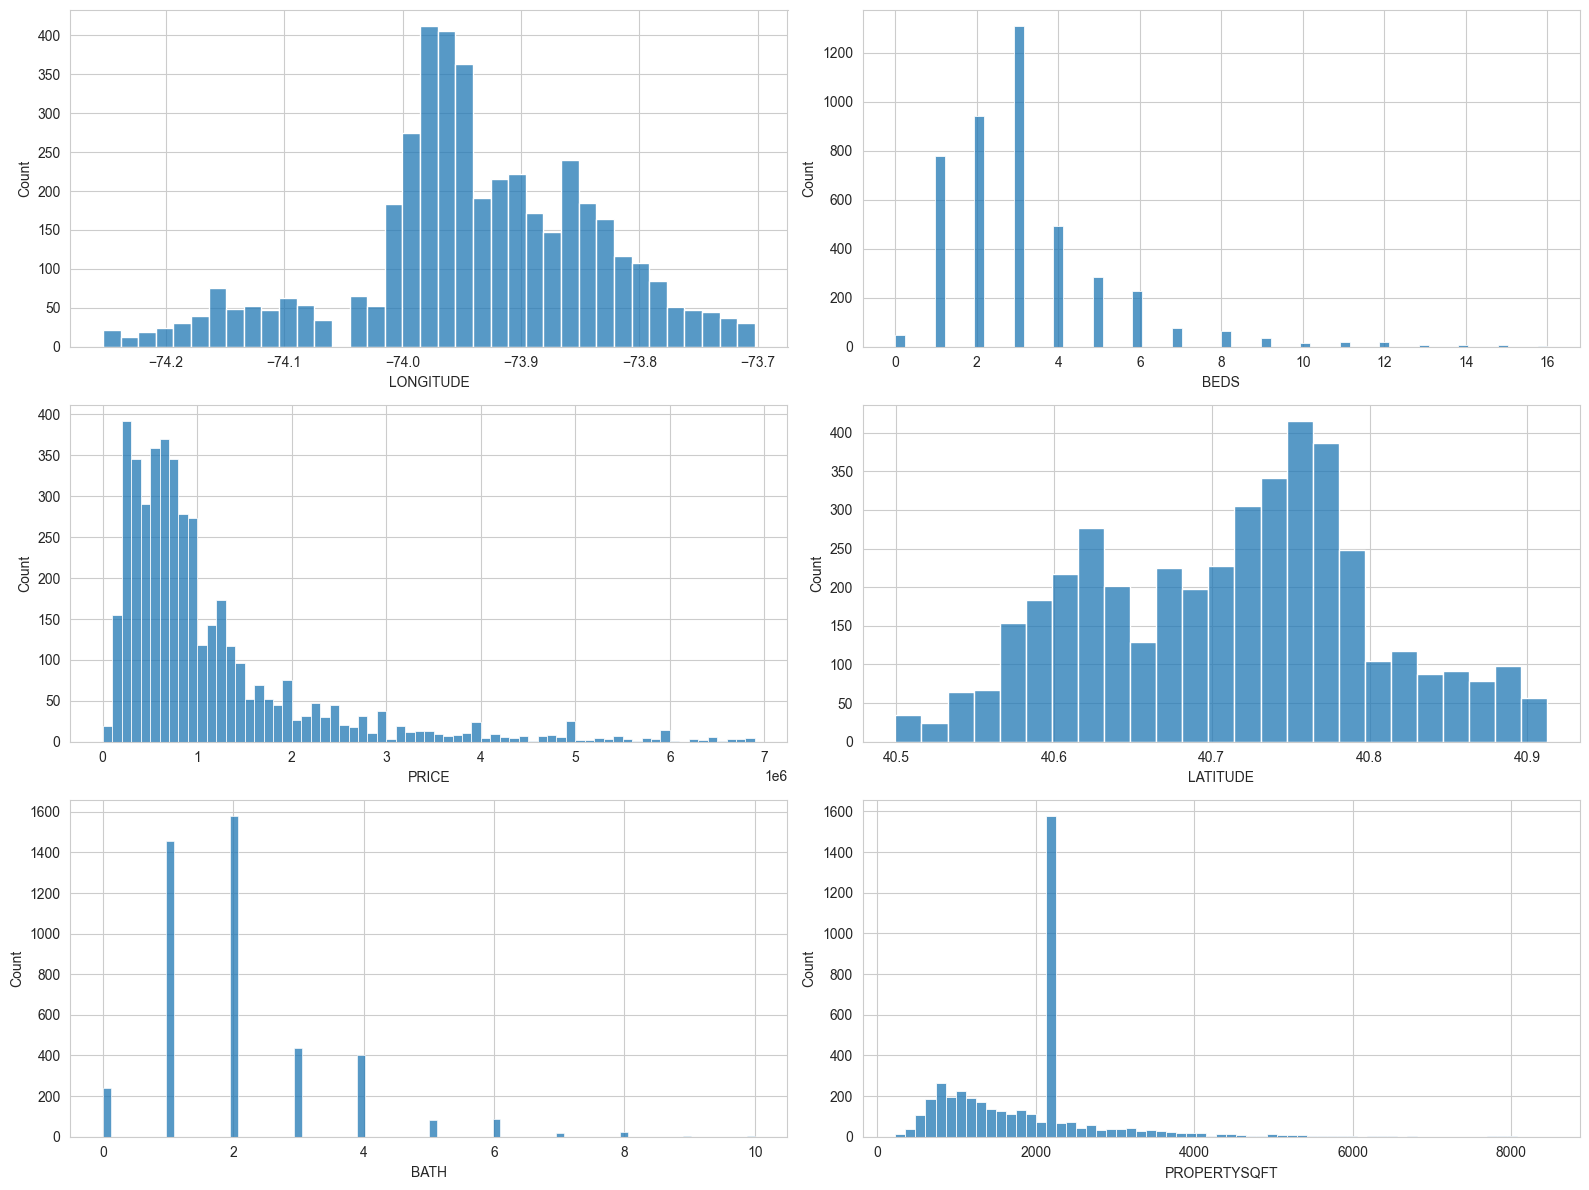

In [1599]:
fig, axes = plt.subplots(3,2, figsize=(16, 12))
axes = axes.flatten()

i=0
for column in numeric_columns:
    sns.histplot(x=data[column], ax=axes[i])
    i=i+1

plt.tight_layout()
plt.show()

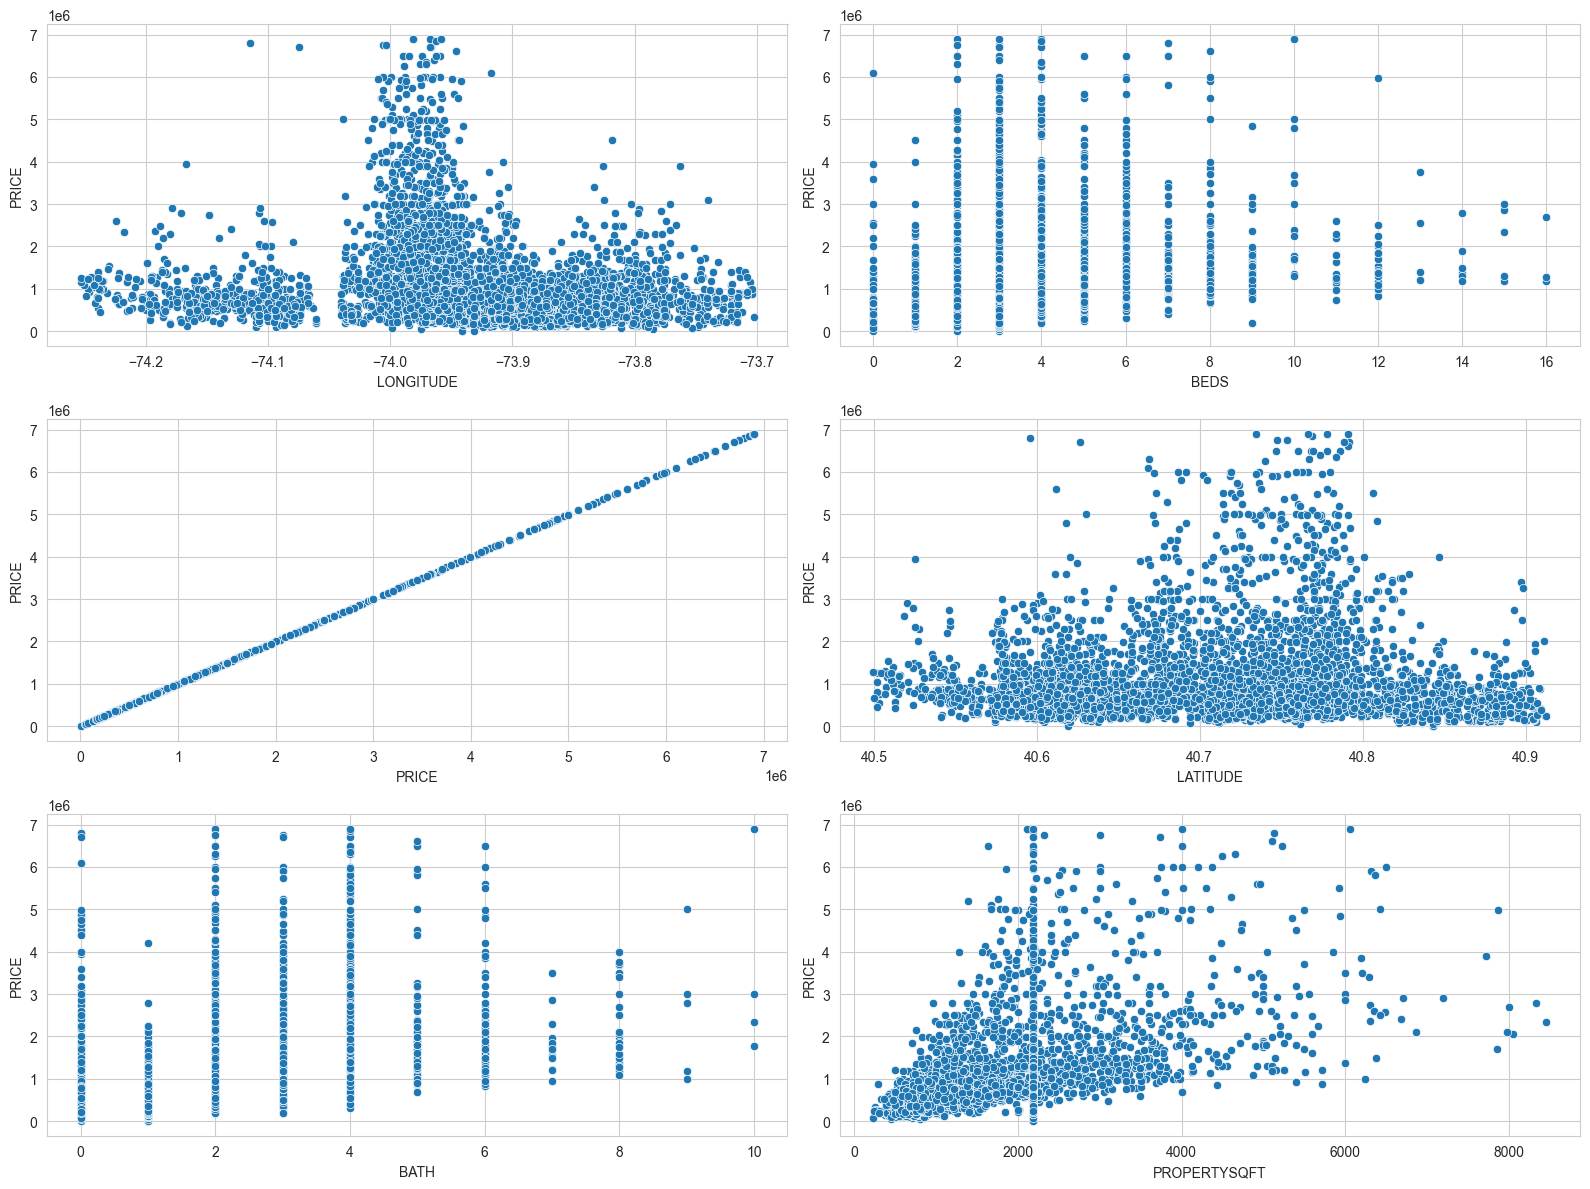

In [1600]:
fig, axes = plt.subplots(3,2, figsize=(16, 12))
axes = axes.flatten()

i=0
for column in numeric_columns:
    sns.scatterplot(x=data[column], y=data['PRICE'], ax=axes[i])
    i=i+1

plt.tight_layout()
plt.show()

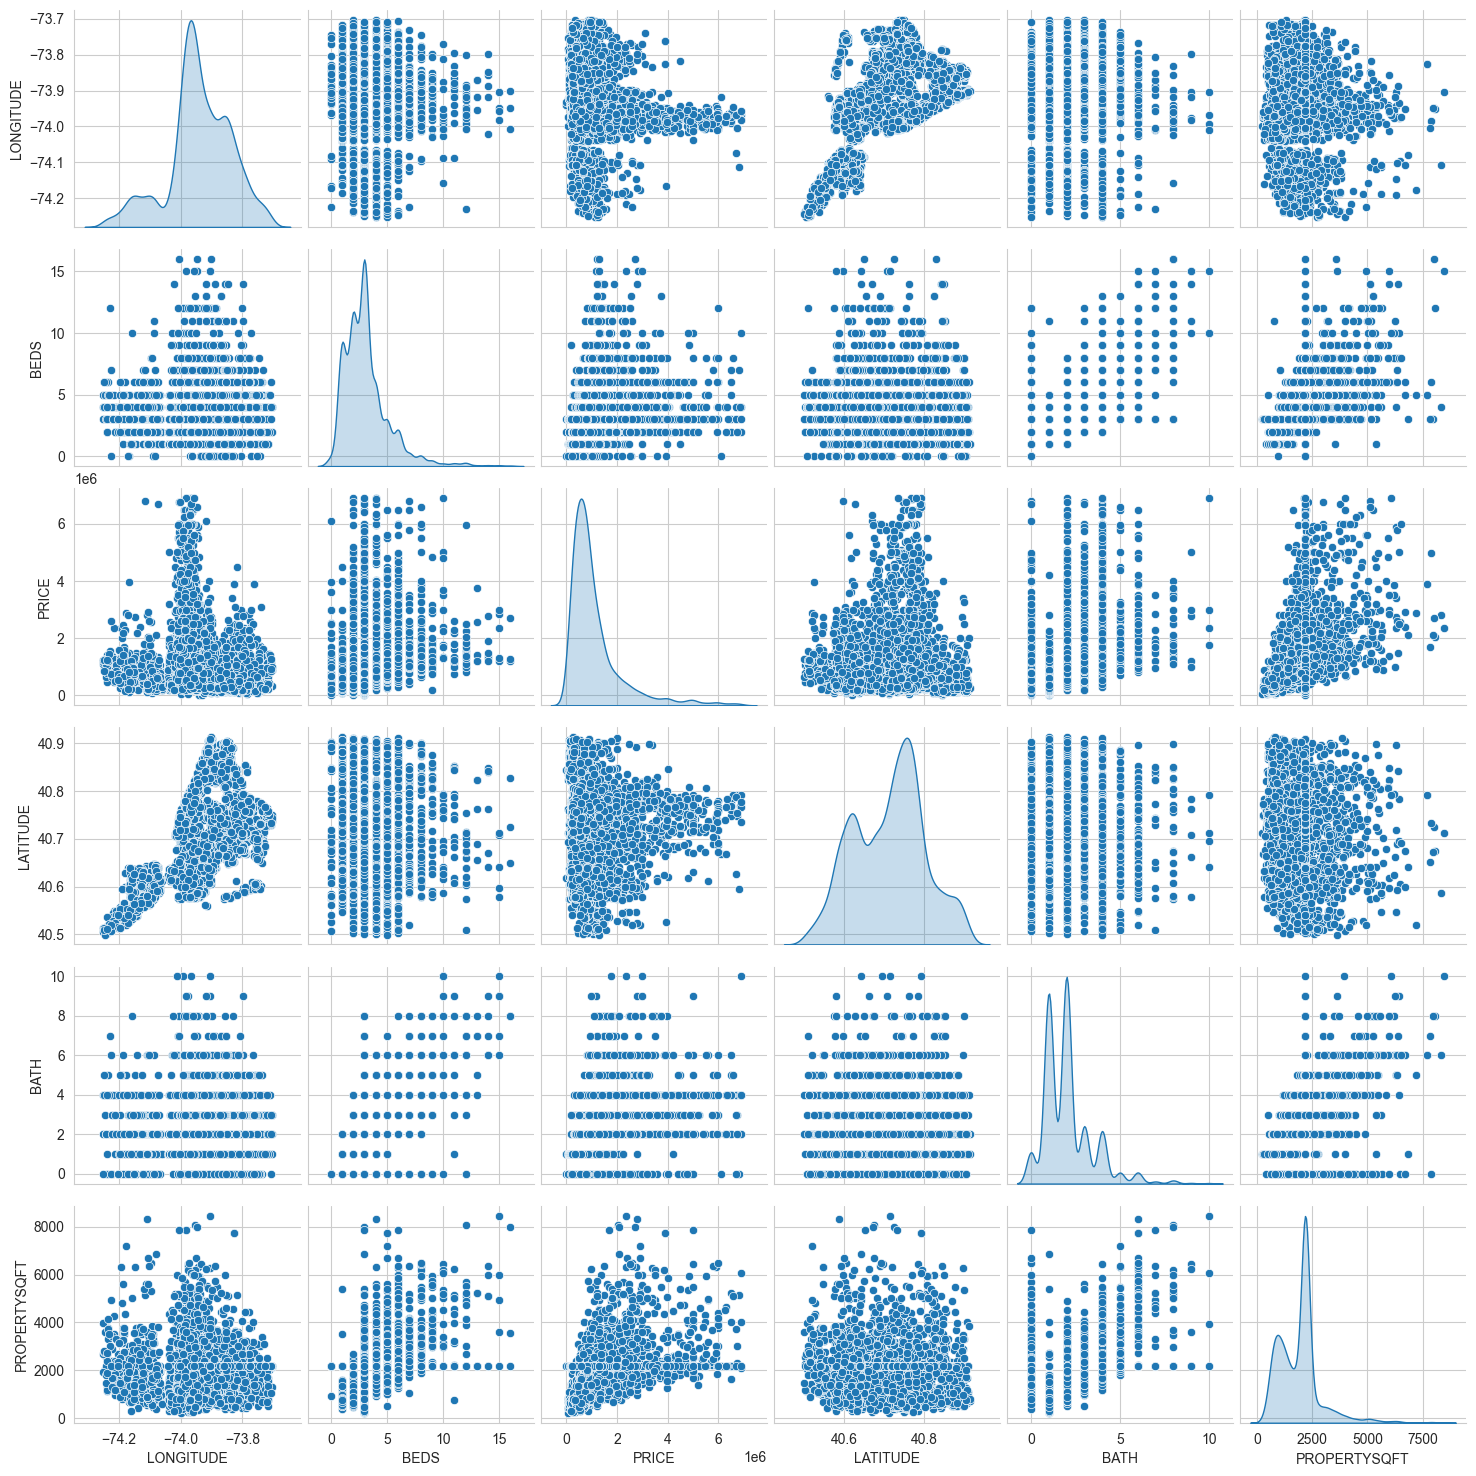

In [1601]:
sns.pairplot(data[numeric_columns],height= 2.5,diag_kind = 'kde')


In [1602]:
data[list(category_columns)].nunique()

LOCALITY                7
OBJECT_TYPE             9
SUBLOCALITY            21
ANNOUNCEMENT_TYPE       3
STREET_NAME          3066
STATE_CODE            178
STATE                  63
NY_ZIPCODE            178
TYPE                   13
BROKER                949
dtype: int64

<Axes: >

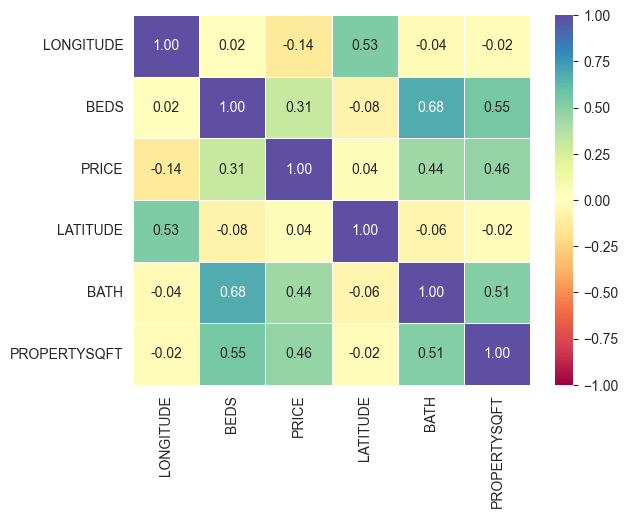

In [1603]:
sns.heatmap(data[numeric_columns].corr(), annot=True, cmap='Spectral', linewidths=0.5,fmt=".2f", vmax=1, vmin=-1)

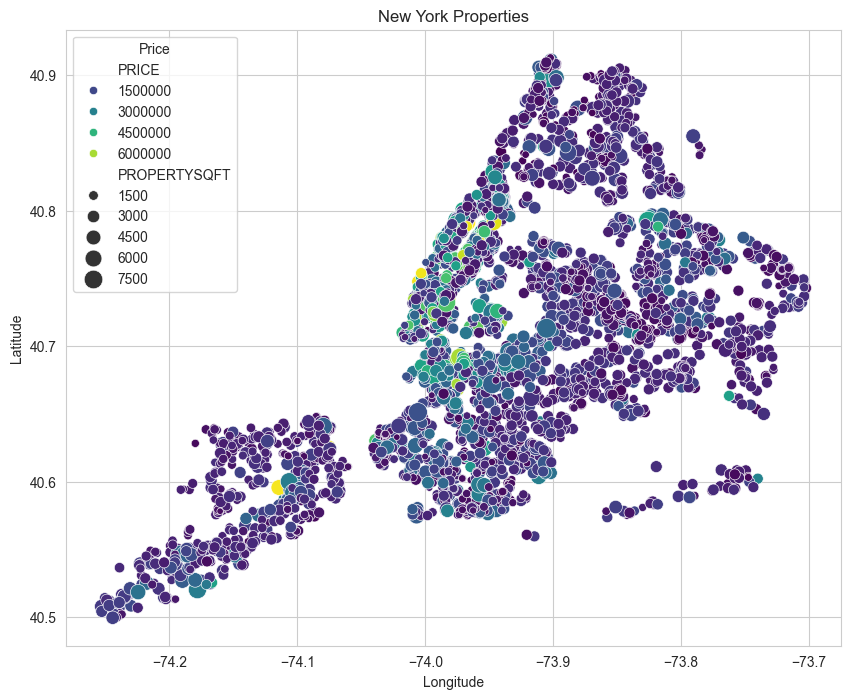

In [1604]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=data, x='LONGITUDE', y='LATITUDE', hue='PRICE', palette='viridis', size='PROPERTYSQFT', sizes=(20, 200))
plt.title('New York Properties')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Price', loc='upper left')
plt.grid(True)
plt.show()

In [1605]:
map_ny = folium.Map(location=[40.7128, -74.0060], zoom_start=10)

for index, row in data.iterrows():
    folium.Marker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        popup=f"{row['TYPE']} for ${row['PRICE']}",
        icon=folium.Icon(color='blue', icon='home'),
    ).add_to(map_ny)

map_ny.save('map_ny.html') 

In [1606]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns = data.select_dtypes(include=['float', 'int64']).columns.tolist()
columns.remove('PRICE')
print(len(columns))

mm_scalers = {}
for column in columns:
    mm_scalers[column] = MinMaxScaler()
    data[column] = mm_scalers[column].fit_transform(data[column].values.reshape(-1, 1))

5


In [1607]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in category_columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [1608]:
for column in category_columns:
    for class_index, class_name in enumerate(label_encoders[column].classes_):
        print(f"{class_name}: {class_index}")

bronx county: 0
brooklyn county: 1
kings county: 2
new york county: 3
queens county: 4
richmond county: 5
united states: 6
co-op: 0
condo: 1
condop: 2
house: 3
land: 4
mobile house: 5
multi-family home: 6
not specified: 7
townhouse: 8
bronx county: 0
brooklyn: 1
brooklyn heights: 2
coney island: 3
dumbo: 4
east bronx: 5
flushing: 6
fort hamilton: 7
jackson heights: 8
kings county: 9
manhattan: 10
new york: 11
new york county: 12
queens: 13
queens county: 14
rego park: 15
richmond county: 16
riverdale: 17
snyder avenue: 18
staten island: 19
the bronx: 20
home: 0
land: 1
other: 2
 102-40 67th dr: 0
 139th st: 1
 161110th st: 2
 2064th st: 3
 21596th st: 4
 23056th st apt: 5
 25574th st: 6
 255th st: 7
 2810th st: 8
 2965th st: 9
 35-25 77th st: 10
 36088th st ph: 11
 40-22 61st st: 12
 5th ave: 13
 600111th st: 14
 63-89 saunders st: 15
 84-12 35th ave: 16
 883rd st: 17
 98th pl: 18
 centre st: 19
 east end ave: 20
 henry hudson pkwy: 21
 john st: 22
 morrison ave: 23
 old fulton st: 24


<Axes: >

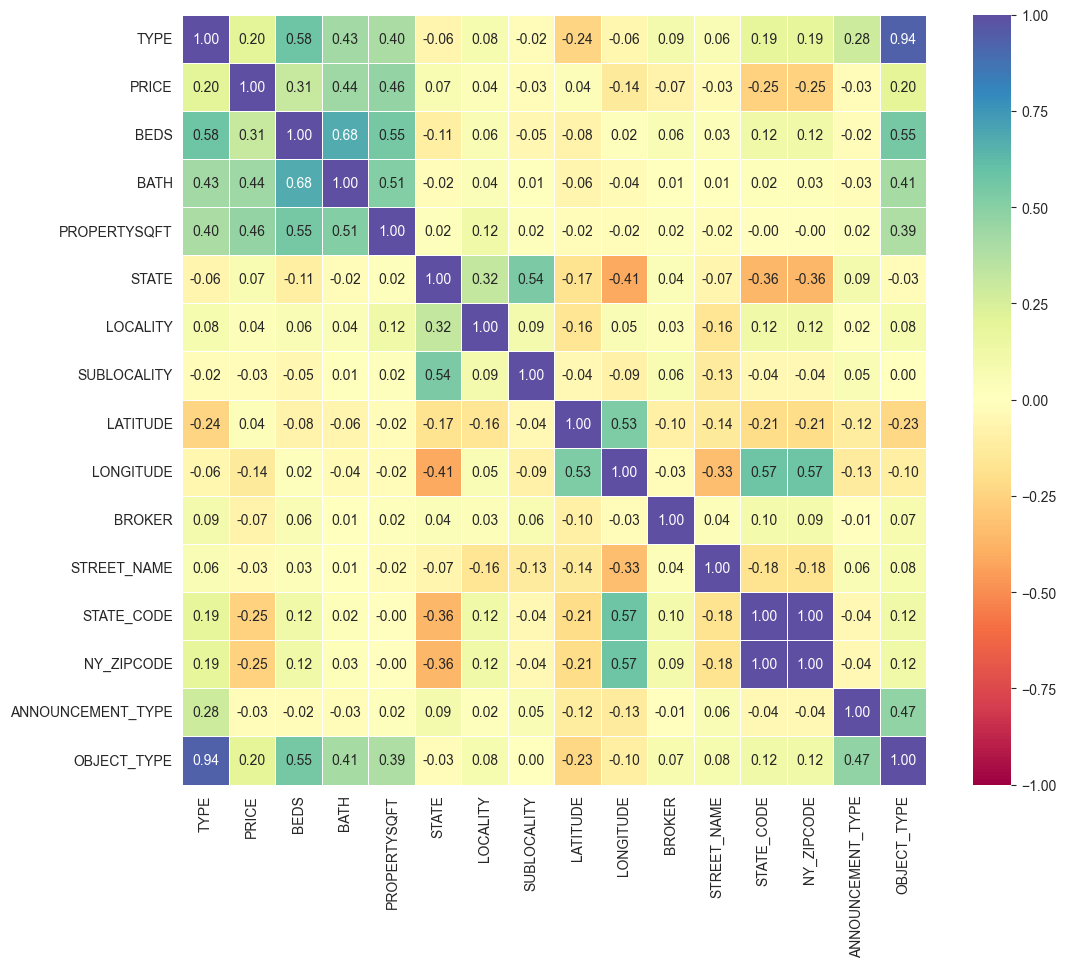

In [1609]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='Spectral', linewidths=0.5,fmt=".2f", vmax=1, vmin=-1)

In [1610]:
corr_matrix = data.corr()
corr_df = pd.DataFrame(abs(corr_matrix['PRICE'].drop('PRICE')).sort_values(ascending=True))
relevant_columns = corr_df[corr_df['PRICE']>=0.03].index
relevant_columns = list(relevant_columns)
relevant_columns.append('PRICE')
data_relevant = data[relevant_columns]

<Axes: >

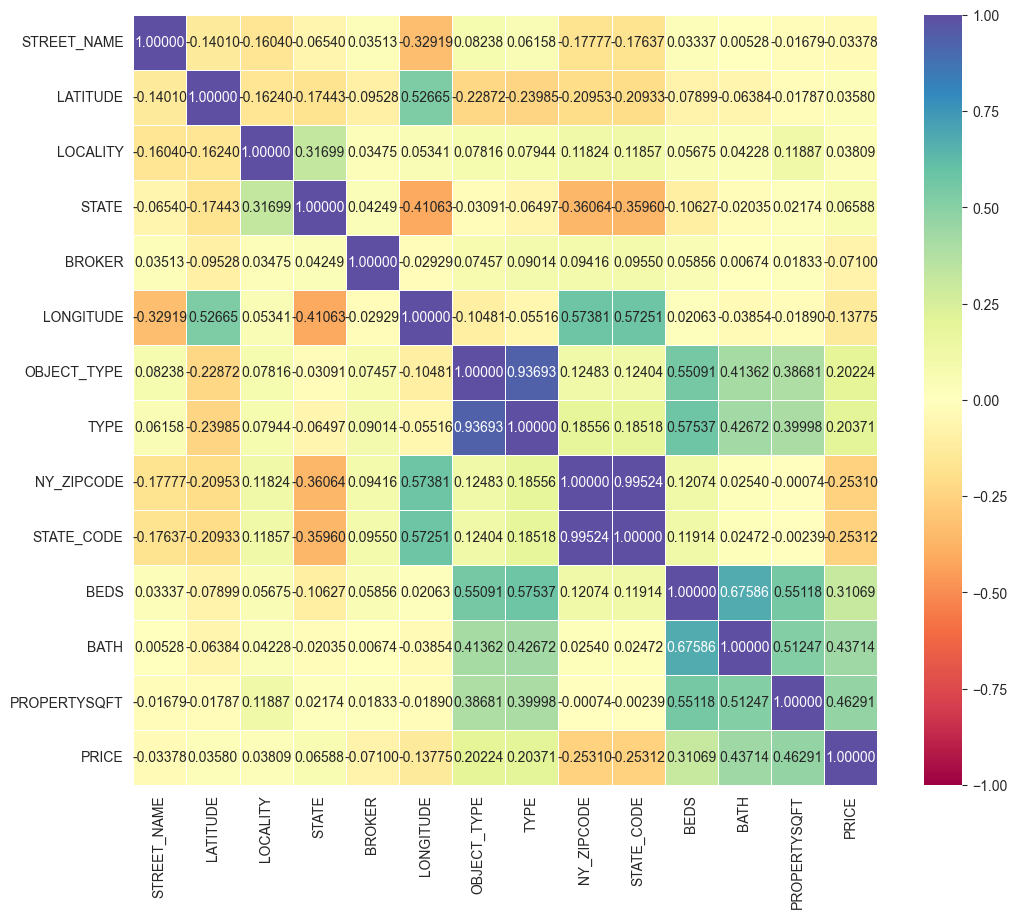

In [1611]:
plt.figure(figsize=(12, 10))
sns.heatmap(data_relevant.corr(), annot=True, cmap='Spectral', linewidths=0.5,fmt=".5f", vmax=1, vmin=-1)

In [1612]:
data.to_excel('clean_data.xlsx')
data_relevant.to_excel('clean_data_relevant.xlsx')

In [1613]:
import numpy as np
from sklearn.decomposition import PCA
X = data_relevant.drop(columns =['PRICE'])
y = data_relevant['PRICE']

n_comp = 3
col_names = ['feature_'+str(i) for i in range(0,n_comp)]
pca = PCA(n_components=n_comp)
data_relevant_pca = pd.DataFrame(pca.fit_transform(X), columns = col_names)
print(pca.explained_variance_ratio_)
data_relevant_pca

[0.9095712  0.08444384 0.00560782]


,feature_0,feature_1,feature_2
0,1701.981853,-142.199463,117.362693
1,-1173.479681,395.452754,43.219365
2,851.839657,-212.842828,103.065712
3,-1012.104529,400.077062,-62.188333
4,1268.156547,-146.924657,104.137285
...,...,...,...
4326,966.262910,-210.664741,73.815139
4327,-104.816182,157.363148,-80.315462
4328,488.009640,-156.347818,112.691272
4329,-74.300489,-146.297742,-89.873899


In [1614]:
data_relevant_pca.to_excel('clean_data_relevant_pca.xlsx')